In [1]:
library(Seurat)

In [3]:
tiss <- Read10X(data.dir = "/projects/CARDIPS/pipeline/scRNAseq/190122_liver_30348985/all_liver_aggregated/outs/filtered_gene_bc_matrices_mex/refdata-cellranger-gencode_v19/")

In [4]:
tiss <- CreateSeuratObject(raw.data = tiss, min.cells = 3, min.genes = 200, project = "human_liver")
tiss <- FilterCells(object = tiss, subset.names = c("nGene", "nUMI"), low.thresholds = c(500, 1000))

In [5]:
tiss

An object of class seurat in project human_liver 
 22234 genes across 8119 samples.

Scaling data matrix


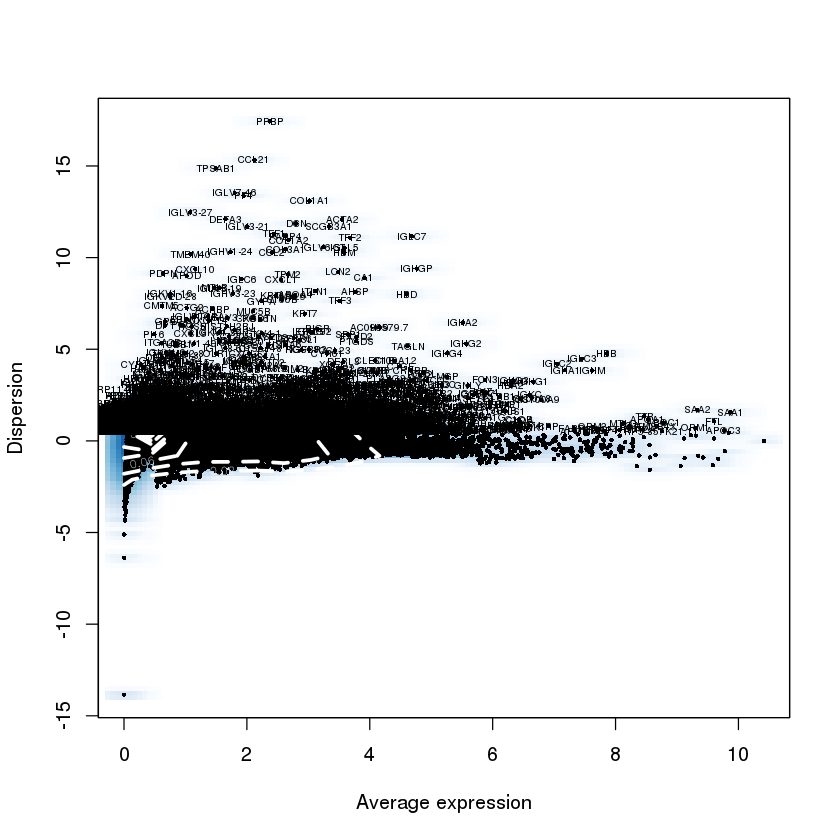

In [6]:
tiss <- NormalizeData(object = tiss, scale.factor = 1e6)
tiss <- ScaleData(object = tiss)
tiss <- FindVariableGenes(object = tiss, do.plot = TRUE, x.high.cutoff = Inf, y.cutoff = 0.5, x.low.cutoff = 0.1)

In [7]:
tiss <- RunPCA(object = tiss, do.print = FALSE)
tiss <- ProjectPCA(object = tiss, do.print = FALSE)

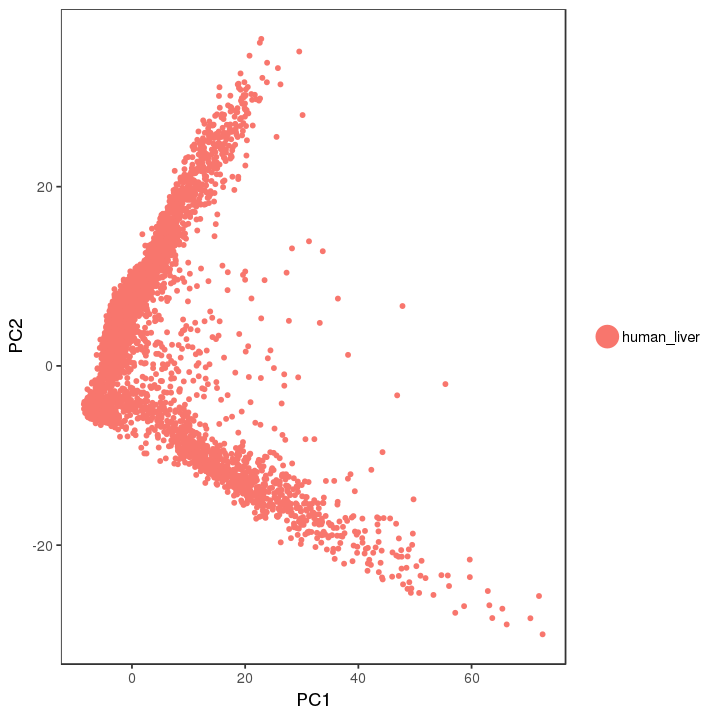

In [8]:
figure_width  =  6
figure_height = 6

options(repr.plot.width = figure_width, repr.plot.height = figure_height)

PCAPlot(object = tiss, dim.1 = 1, dim.2 = 2, remove.legend = TRUE)

# PCHeatmap(object = tiss, pc.use = 1:6, do.balanced = TRUE, label.columns = FALSE, use.full = FALSE,  num.genes = 8)

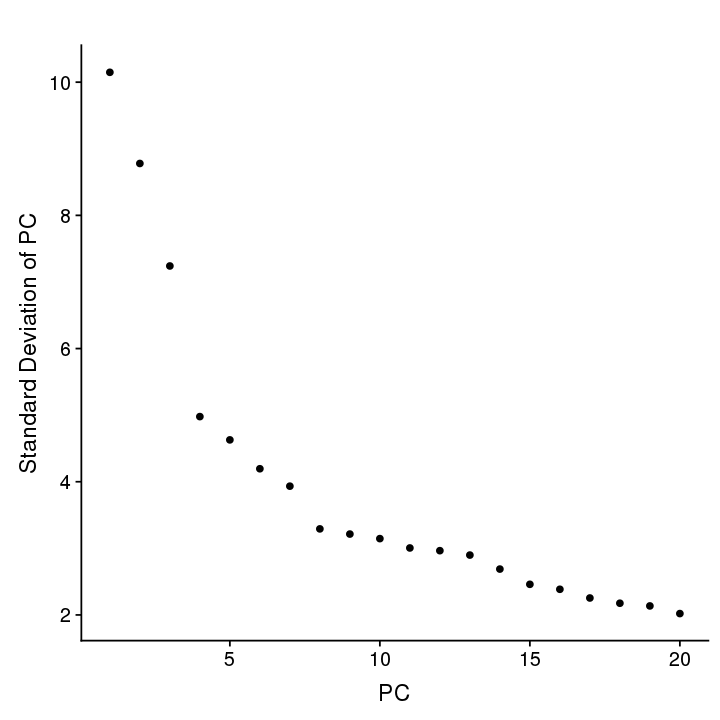

In [9]:
PCElbowPlot(object = tiss)

In [14]:
n.pcs = 8
res.used <- 1

tiss <- FindClusters(object = tiss, reduction.type = "pca", dims.use = 1:n.pcs, resolution = res.used, print.output = 0, save.SNN = TRUE,  force.recalc = TRUE)

tiss <- RunUMAP(object = tiss, reduction.use = "pca", dims.use = 1:n.pcs, min_dist = .8, seed = 10)

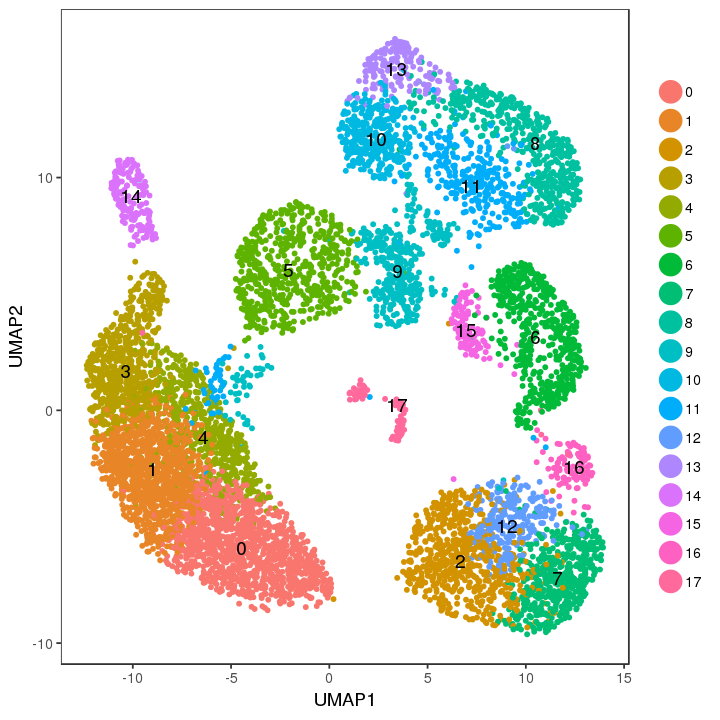

In [15]:
figure_width  =  6
figure_height = 6
options(repr.plot.width = figure_width, repr.plot.height = figure_height)


DimPlot(tiss, reduction.use = "umap", do.label = T)


In [16]:
stash_annotations = function(tiss, cluster.ids, cell_ontology_class){
  tiss <- StashIdent(object = tiss, save.name = "cluster.ids")

  tiss@meta.data['cell_ontology_class'] <- as.character(plyr::mapvalues(x = tiss@ident, from = cluster.ids, to = cell_ontology_class))

  return(tiss)
}

In [17]:
tiss <- StashIdent(object = tiss, save.name = "cluster.ids")

In [18]:
cluster.ids <- seq(0, 17)

In [ ]:
"abT_cell", "central_venous_sinusoidal_endothelial_cells", "Cholangiocytes", "gdT_cell", "Hepatic_Stellate_Cells",
"Hepatocytes0", "Hepatocytes1", "Hepatocytes3", "Hepatocytes4", "inflammatory_macrophages", "Kupffer_cell", "Mature_B_cells",
"NK.NKT_cell", "Periportal_sinusoidal_endothelial_cells", "Plasma_cell")

In [24]:
cell_ontology_class <-c("Hepatocytes0",
                        "Hepatocytes1",
                        "abT_cell",
                        "Hepatocytes3",
                        "Hepatocytes4",
                        "Periportal_sinusoidal_endothelial_cells",
                        "Plasma_cell",
                        "gdT_cell",
                        "inflammatory_macrophages",
                        "central_venous_sinusoidal_endothelial_cells",
                        "Kupffer_cell",
                        "inflammatory_macrophages",
                        "abT_cell",
                        "Kupffer_cell",
                        "Cholangiocytes",
                        "Mature_B_cells",
                        "NK.NKT_cell",
                        "Hepatic_Stellate_Cells"
                        )

In [25]:
tiss = stash_annotations(tiss, cluster.ids, cell_ontology_class)

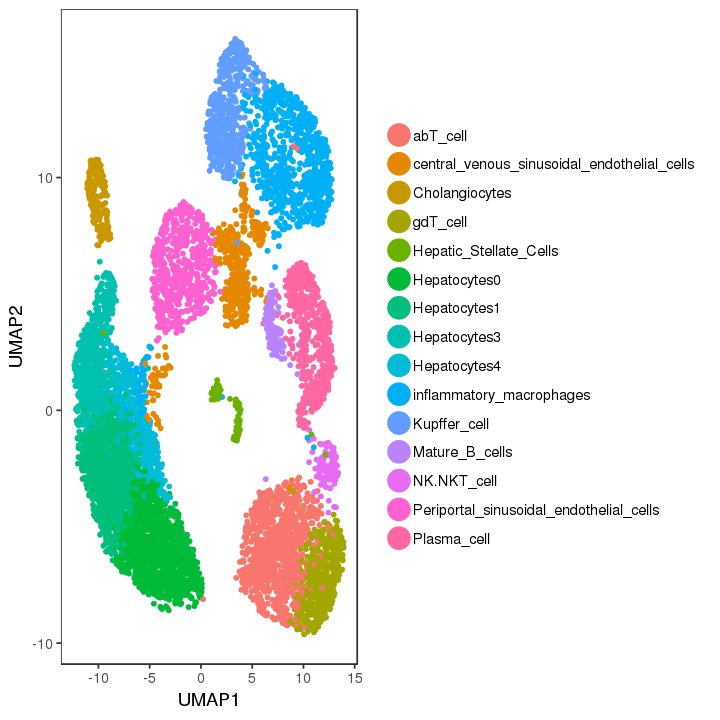

In [26]:
DimPlot(tiss, reduction.use = "umap", do.label = F, group.by = "cell_ontology_class")

In [2]:
# save(tiss, file="../data/Robjs/human_liver_seurat.Robj")